In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

In [4]:
X

array([[ 7.62115459],
       [ 1.19630112],
       [ 3.53380644],
       [ 9.25439181],
       [ 7.11829494],
       [-0.39419152],
       [ 3.67626798],
       [-0.37559365],
       [ 0.47366376],
       [ 2.08654845],
       [ 1.13644197],
       [ 6.08890743],
       [ 2.7857832 ],
       [ 1.05971955],
       [ 1.69505192],
       [ 1.57543423],
       [ 6.26049188],
       [-0.25166129],
       [ 1.43649462],
       [-0.57743374],
       [-2.44006216],
       [ 2.28465414],
       [ 3.54721625],
       [-0.34424925],
       [ 8.87064814],
       [-1.49925604],
       [ 0.052488  ],
       [ 0.36759527],
       [ 6.33280528],
       [ 5.99967363],
       [ 0.38881488],
       [ 1.67442484],
       [-1.09008555],
       [-1.9712473 ],
       [-0.53866597],
       [ 0.82832586],
       [ 5.09413997],
       [ 4.74702977],
       [-0.2685248 ],
       [-0.6302212 ],
       [-1.49593024],
       [-1.28820043],
       [-1.65626814],
       [ 7.99361101],
       [ 0.20529125],
       [-0

In [5]:
y

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0)

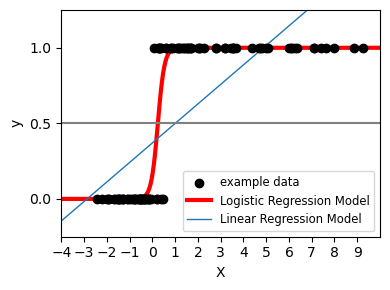

In [11]:
# plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20) # plotting the original data
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel() # expit function is used to predict 
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3) # plotting logistic regression curve, we pass 
                                                                              # X-test and y pred which is loss in this case
 
# plotting Linear regression on this data 
ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")


plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()